In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
mean_a = [-1, -1]
cov_a = [[2, 0.5], [0.5, 1]]

mean_b = [1, -1]
cov_b = [[1, -0.5], [-0.5, 2]]

mean_c = [0, 1]
cov_c = [[1, 0], [0, 2]]

In [22]:
alpha = 0.5
sample_a = np.random.multivariate_normal(mean_a, np.dot(alpha,cov_a), 100)
sample_b = np.random.multivariate_normal(mean_b, np.dot(alpha,cov_b), 100)
sample_c = np.random.multivariate_normal(mean_c, np.dot(alpha,cov_c), 100)

sample = np.concatenate((sample_a, sample_b, sample_c))

In [102]:
alphas = [0.5, 1, 2, 4, 8]
kmeans_scores = []
kmeans_acc = []
gmm_scores = []
gmm_acc = []
for alpha in alphas:
    sample_a = np.random.multivariate_normal(mean_a, np.dot(alpha,cov_a), 100)
    sample_b = np.random.multivariate_normal(mean_b, np.dot(alpha,cov_b), 100)
    sample_c = np.random.multivariate_normal(mean_c, np.dot(alpha,cov_c), 100)

    sample = np.concatenate((sample_a, sample_b, sample_c))

    # k-means
    kmeans = KMeans(n_clusters=3, init='k-means++', algorithm="lloyd").fit(sample)
    kmeans_scores.append(kmeans.score(sample))

    kmeans_labels = kmeans.labels_
    kmeans_incorrect = []
    for idx, label in enumerate(kmeans_labels):
        if idx < 100:
            if label != np.bincount(kmeans_labels[:100]).argmax():
                kmeans_incorrect.append((idx, label, 'a'))
        if idx >= 100 and idx < 200:
            if label != np.bincount(kmeans_labels[100:200]).argmax():
                kmeans_incorrect.append((idx, label, 'b'))
        if idx >= 200:
            if label != np.bincount(kmeans_labels[200:]).argmax():
                kmeans_incorrect.append((idx, label, 'c'))
    k_acc = 1 - (len(kmeans_incorrect)/len(sample))
    kmeans_acc.append(k_acc)

    # GMM 
    GMM = GaussianMixture(n_components=3).fit(sample)
    gmm_scores.append(GMM.score(sample))

    gmm_labels = []
    for point in sample:
        distance_to_mean = []
        for i in range(3):
            dist = np.sqrt((point[0] - GMM_means[i][0])**2 + (point[1] - GMM_means[i][1])**2)
            distance_to_mean.append(dist)
        label = np.argmin(distance_to_mean)
        gmm_labels.append(label)

    gmm_incorrect = []
    for idx, label in enumerate(gmm_labels):
        if idx < 100:
            if label != np.bincount(gmm_labels[:100]).argmax():
                gmm_incorrect.append((idx, label, 'c'))
        if idx >= 100 and idx < 200:
            if label != np.bincount(gmm_labels[100:200]).argmax():
                gmm_incorrect.append((idx, label, 'a'))
        if idx >= 200:
            if label != np.bincount(gmm_labels[200:]).argmax():
                gmm_incorrect.append((idx, label, 'b'))
    
    g_acc = 1 - (len(gmm_incorrect)/len(sample))
    gmm_acc.append(g_acc)

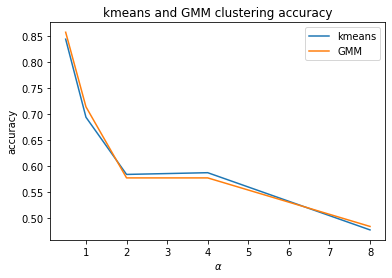

In [122]:
plt.plot(alphas, kmeans_acc, label='kmeans')
plt.plot(alphas, gmm_acc, label='GMM')
plt.ylabel('accuracy')
plt.xlabel(r'$\alpha$')
plt.title('kmeans and GMM clustering accuracy')
plt.legend()
plt.savefig('clustering_acc.pdf')
plt.show()

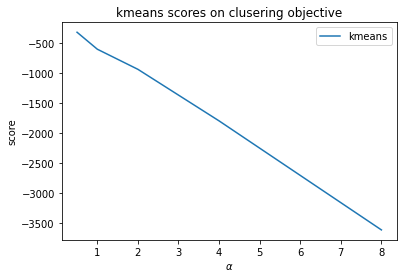

In [123]:
plt.plot(alphas, kmeans_scores, label='kmeans')
plt.title('kmeans scores on clusering objective')
plt.ylabel('score')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.savefig('kmeans_score.pdf')
plt.show()

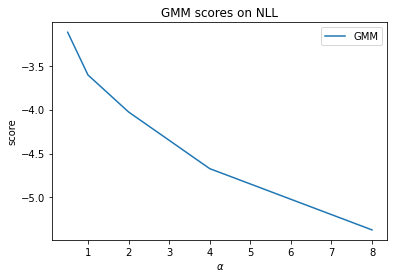

In [124]:
plt.plot(alphas, gmm_scores, label='GMM')
plt.title('GMM scores on NLL')
plt.ylabel('score')
plt.xlabel(r'$\alpha$')
plt.legend()
plt.savefig('gmm_score.pdf')
plt.show()

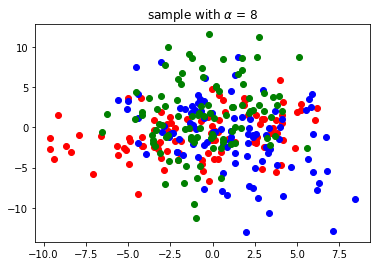

In [121]:
plt.scatter(sample_a[:,0], sample_a[:,1], color='red')
plt.scatter(sample_b[:,0], sample_b[:,1], color='blue')
plt.scatter(sample_c[:,0], sample_c[:,1], color='green')
plt.title(r'sample with $\alpha$ = 8')
plt.show()